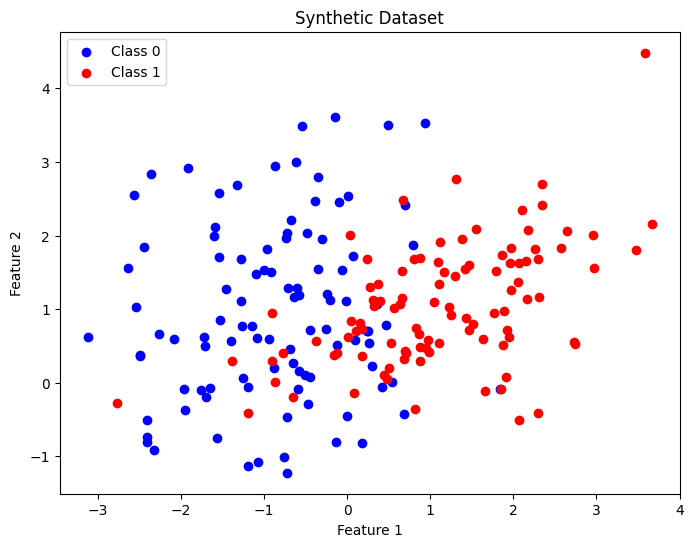

Accuracy of combined classifier: 0.20


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Dataset')
plt.show()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
clf1 = LogisticRegression()
clf2 = SVC(probability=True)
clf3 = DecisionTreeClassifier()

# Fit classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Predict probabilities
y_pred1 = clf1.predict_proba(X_test)[:, 1]
y_pred2 = clf2.predict_proba(X_test)[:, 1]
y_pred3 = clf3.predict_proba(X_test)[:, 1]

# Combine predictions based on maximum confidence
predictions = np.array([y_pred1, y_pred2, y_pred3])
max_confidence_classifier_index = np.argmax(predictions, axis=0)
combined_predictions = [np.argmax([y_pred1[i], y_pred2[i], y_pred3[i]]) for i in range(len(X_test))]

# Evaluate the combined classifier
accuracy = accuracy_score(y_test, combined_predictions)
print(f'Accuracy of combined classifier: {accuracy:.2f}')
